In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv(r"D:\crime\report.csv")

In [4]:
df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

In [5]:
df_total_US = df[df.agency_jurisdiction == 'United States']
df_no_total_US=df[df.agency_jurisdiction != 'United States']

[Text(0, 0.5, 'City'), Text(0.5, 0, 'Total number of crimes')]

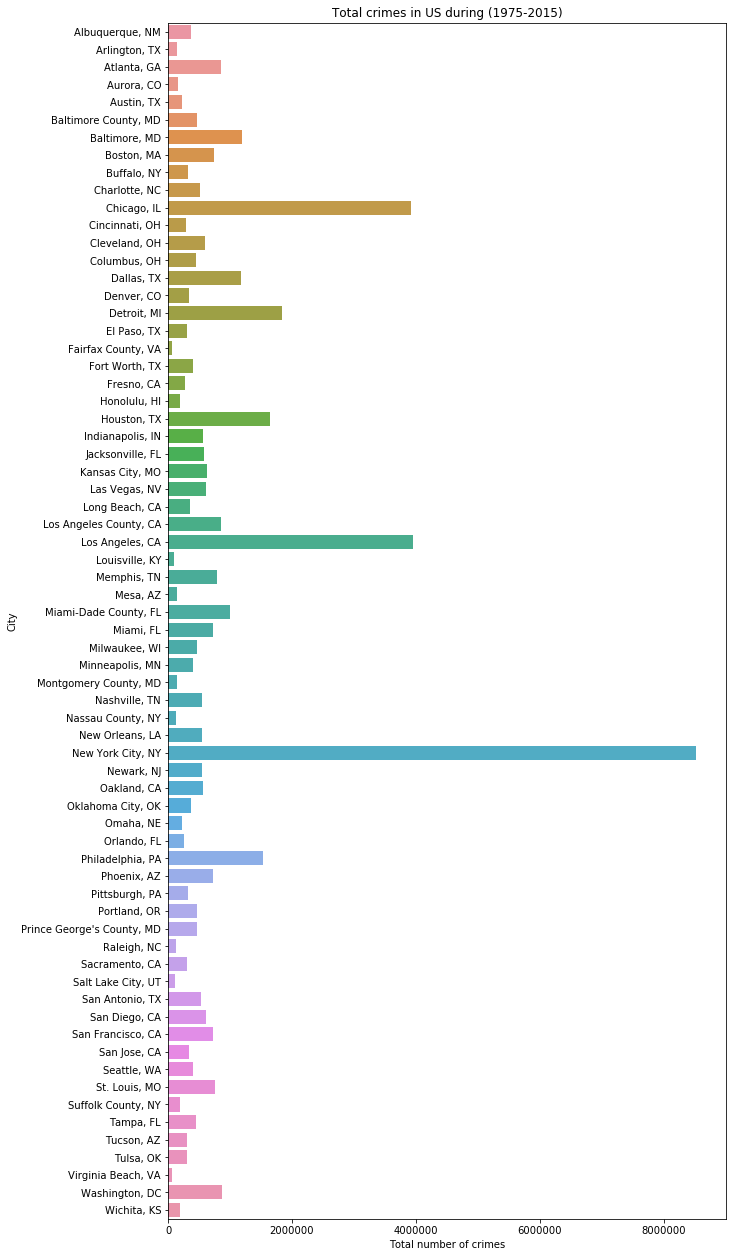

In [6]:
ax=plt.figure(figsize=(10,22))
ax = sns.barplot(df_no_total_US["violent_crimes"]+df_no_total_US["homicides"]+
                 df_no_total_US["rapes"]+df_no_total_US["assaults"]+df_no_total_US["robberies"],                 
                 y=df_no_total_US["agency_jurisdiction"],estimator=sum ,ci=0)
ax.set_title('Total crimes in US during (1975-2015)')
ax.set(xlabel='Total number of crimes', ylabel='City')

In [11]:
df_no_total_US.fillna(value=0)
violent_crimes=df_no_total_US["violent_crimes"]
total_number_of_crimes=np.nansum(violent_crimes)
print("Total number of crimes between 1975-2015 in US is:",total_number_of_crimes)
max_index, max_crimes_jur= max(enumerate(df_no_total_US["violent_crimes"]), key=operator.itemgetter(1))
max_crimes_jura=df_no_total_US.iloc[max_index] ["agency_jurisdiction"]

NYC = df_no_total_US[df_no_total_US.agency_jurisdiction == 'New York City, NY']
total_nyc=NYC['violent_crimes'].sum()
precent=total_nyc/total_number_of_crimes*100
print("The jurisdiction with the most crimes is:",max_crimes_jura, "and total number of crimes:",total_nyc, "that is %0.2f"% precent,"% of total crimes in USA between 1975-2015.")


Total number of crimes between 1975-2015 in US is: 24629376.0
The jurisdiction with the most crimes is: New York City, NY and total number of crimes: 4263284.0 that is 17.31 % of total crimes in USA between 1975-2015.


In [12]:
max_index, max_crimes = max(enumerate(NYC["violent_crimes"]), key=operator.itemgetter(1))
max_crimes_year=NYC.iloc[max_index] ["report_year"]
print("The higest number of crimes was",max_crimes,"in",max_crimes_year)

The higest number of crimes was 174542.0 in 1990


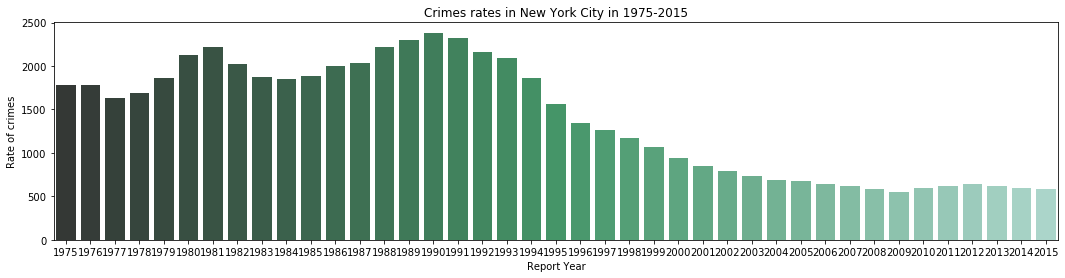

In [13]:
plt.figure(figsize=(18,4))
sns.barplot(NYC["report_year"], NYC["crimes_percapita"], palette="BuGn_d",)
plt.ylabel("Rate of crimes")
plt.title('Crimes rates in New York City in 1975-2015')
plt.xlabel("Report Year")
plt.show()

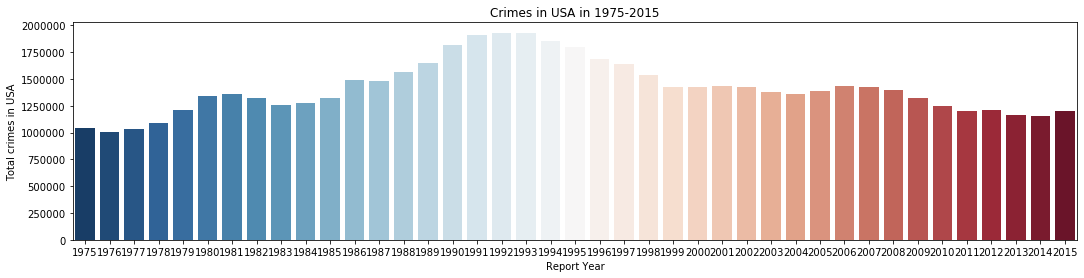

In [14]:
plt.figure(figsize=(18,4))
sns.barplot(df_total_US["report_year"], df_total_US["violent_crimes"], palette="RdBu_r",)
plt.ylabel("Total crimes in USA")
plt.title('Crimes in USA in 1975-2015')
plt.xlabel("Report Year")
plt.show()

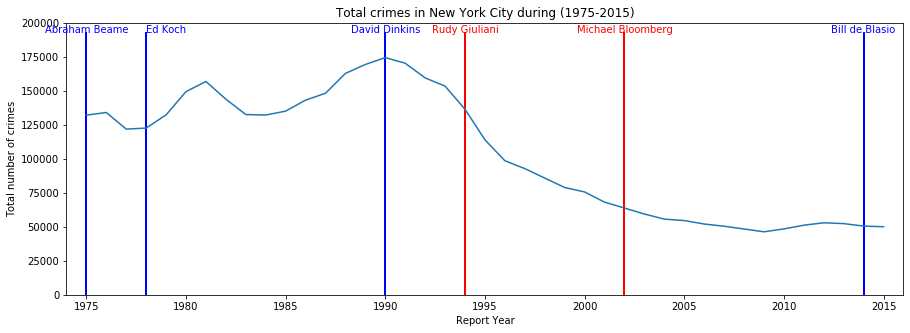

In [15]:
ax=plt.figure(5,figsize=(15,5))
ax = plt.plot([1975, 1975], [0, 193000], 'b-', lw=2)
ax = plt.text(1975, 193000, 'Abraham Beame',color='blue',horizontalalignment='center')

ax = plt.plot([1978, 1978], [0, 193000], 'b-', lw=2)
ax = plt.text(1978, 193000, 'Ed Koch',color='blue',horizontalalignment='left')

ax = plt.plot([1990, 1990], [0, 193000], 'b-', lw=2)
ax = plt.text(1990, 193000, 'David Dinkins',color='blue',horizontalalignment='center')

ax = plt.plot([1994, 1994], [0, 193000], 'r-', lw=2)
ax = plt.text(1994, 193000, 'Rudy Giuliani',color='red',horizontalalignment='center')

ax = plt.plot([2002, 2002], [0, 193000], 'r-', lw=2)
ax = plt.text(2002, 193000, 'Michael Bloomberg',color='red',horizontalalignment='center')

ax = plt.plot([2014, 2014], [0, 193000], 'b-', lw=2)
ax = plt.text(2014, 193000, 'Bill de Blasio',color='blue',horizontalalignment='center')

ax = plt.plot(NYC["report_year"],NYC["violent_crimes"])
plt.title('Total crimes in New York City during (1975-2015)')
plt.xlabel("Report Year")
plt.ylabel("Total number of crimes")
plt.ylim([0,200000])
plt.xlim([1974,2016])
plt.show()

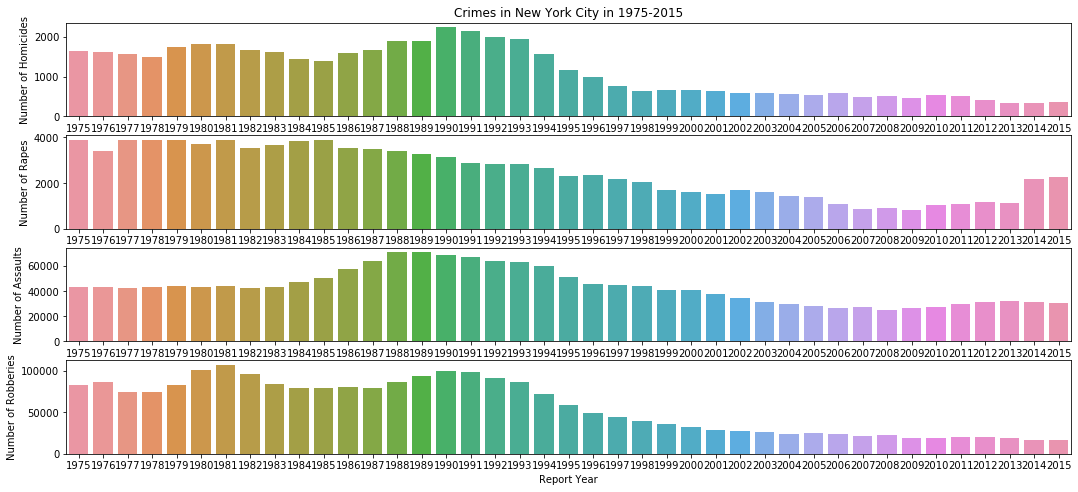

In [16]:
plt.figure(figsize=(18,10))

ax1 = plt.subplot(511)
sns.barplot(NYC["report_year"], NYC["homicides"])
plt.ylabel("Number of Homicides")

ax2 = plt.subplot(512, sharex=ax1)
sns.barplot(NYC["report_year"], NYC["rapes"])
plt.ylabel("Number of Rapes")

ax3 = plt.subplot(513, sharex=ax1)
sns.barplot(NYC["report_year"], NYC["assaults"])
plt.ylabel("Number of Assaults")

ax4 = plt.subplot(514, sharex=ax1)
sns.barplot(NYC["report_year"], NYC["robberies"])
plt.ylabel("Number of Robberies")

ax1.set_title('Crimes in New York City in 1975-2015')
plt.xlabel("Report Year")
plt.show()